<a href="https://colab.research.google.com/github/eliasfrivas/Colab/blob/main/ProyectoDS_Partel_Rivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

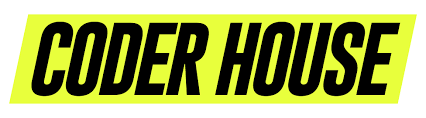

# **Proyecto DS - Rivas**
Dataset Video Games Lanzados desde 1980 a 2020

En este proyecto vamos a analizar como fue evolucionando y ampliando la cantidad de Videos Juegos que fueron lanzados desde 1980 por diferentes plataformas, generos, Precios de lanzamiento, Criticas y Cantidad de Usuarios

¿Cuales son los Generos que fueron mas lanzados?
Media de Jugadores por Genero
Juegos con alto y bajo Critic Score


Finalizando en analisis nos basaremos en encontrar el genero mas Publicado y cuales tuvieron mejor aceptacion

In [26]:
#Vamos a importar las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Cargamos nuestro Dataset (By kaggle)
print("Primeras 5 filas del dataset:")
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT--Iw_aY43yv6z1hgffZlW8i9DswAVpYdAz3i2AY1j9AsDmr6uHF-dcNhEvrX-QhVqbcNhtW5I9V8y/pub?gid=1088532269&single=true&output=csv')
df.head()

Primeras 5 filas del dataset:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Info de nuestro Dataset
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory

In [29]:
#Filas y columnas
df.shape

(16719, 16)

In [30]:
#Algunas metricas
print("Estadísticas Descriptivas:")
df.describe()

Estadísticas Descriptivas:


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [31]:
# Verifica si hay valores nulos
print("Valores Nulos por Columna:")
df.isnull().sum()

Valores Nulos por Columna:


,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [32]:
# Convertir la columna 'Year_of_Release' a tipo datetime
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y')
df['Año'] = df['Year_of_Release'].dt.year
df['Año'] = df['Año'].astype('Int64')
df['User_Count'] = df['User_Count'].fillna(0).astype(int) #Convertimos el dato float a int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             16717 non-null  object        
 1   Platform         16719 non-null  object        
 2   Year_of_Release  16450 non-null  datetime64[ns]
 3   Genre            16717 non-null  object        
 4   Publisher        16665 non-null  object        
 5   NA_Sales         16719 non-null  float64       
 6   EU_Sales         16719 non-null  float64       
 7   JP_Sales         16719 non-null  float64       
 8   Other_Sales      16719 non-null  float64       
 9   Global_Sales     16719 non-null  float64       
 10  Critic_Score     8137 non-null   float64       
 11  Critic_Count     8137 non-null   float64       
 12  User_Score       10015 non-null  object        
 13  User_Count       16719 non-null  int64         
 14  Developer        10096 non-null  objec

In [33]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Año
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322,Nintendo,E,2006
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,0,NaN,NaN,1985
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709,Nintendo,E,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192,Nintendo,E,2009
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,0,NaN,NaN,1996


In [34]:
#Conteo por Nombre de Juegos
conteo_games = df['Name'].value_counts()
print(conteo_games)

Name
Need for Speed: Most Wanted    12
Ratatouille                     9
Madden NFL 07                   9
FIFA 14                         9
LEGO Marvel Super Heroes        9
                               ..
Nintendogs                      1
Duck Hunt                       1
New Super Mario Bros. Wii       1
Wii Play                        1
New Super Mario Bros.           1
Name: count, Length: 11562, dtype: int64


In [35]:
#Conteo por Genero
conteo_genero = df['Genre'].value_counts()
print(conteo_genero)

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64


In [36]:
#Promedio de juegos lanzados
conteo_genero = df['Genre'].value_counts()
print(conteo_genero.mean())

1393.0833333333333


In [37]:
#Cantidad de juegos lanzados por Año:
print("Cantidad de Juegos lanzados por Año:")
conteo_año = df['Año'].value_counts()
print(conteo_año)

Cantidad de Juegos lanzados por Año:
Año
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: Int64


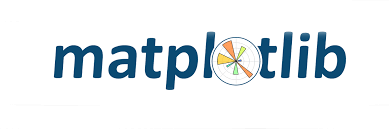
# Graficos en MATPLOTLIB

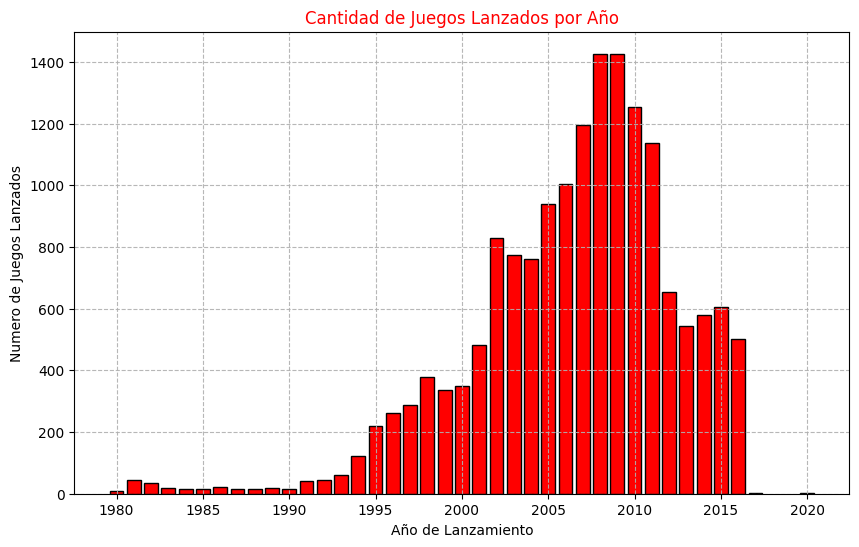

In [38]:
#Vamos a graficar la evolucion temporal para observar como desde 1980 se fueron lanzando videos juegos y podremos entender como fue creciendo este mercado:

plt.figure(figsize=(10, 6))
#plt.plot(df['Year_of_Release'], sum(conteo_año))
plt.bar(conteo_año.index, conteo_año.values, edgecolor = 'Black' ,color = 'Red')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Numero de Juegos Lanzados")
plt.title("Cantidad de Juegos Lanzados por Año", color = 'Red')
#plt.legend()
plt.grid(True,linestyle='--', alpha=0.9)
plt.show()

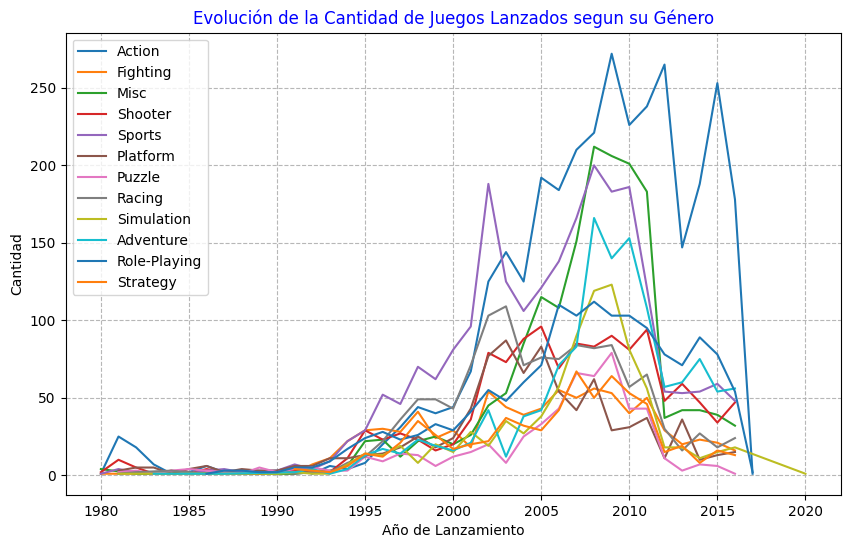

In [39]:
#Vamos a graficar la evolucion temporal para observar como desde 1980 se fueron lanzando videos juegos en diferentes Generos y cual fueron de mayor impacto:

# Agrupa por año y cuenta la cantidad de juegos por género
genre_by_year = df.groupby(['Año', 'Genre'])['Genre'].count().reset_index(name='Count')

# Crea un gráfico de líneas para cada género
plt.figure(figsize=(10, 6))
for genre in genre_by_year['Genre'].unique():
    genre_data = genre_by_year[genre_by_year['Genre'] == genre]
    plt.plot(genre_data['Año'], genre_data['Count'], label=genre)

plt.xlabel("Año de Lanzamiento")
plt.ylabel("Cantidad")
plt.title("Evolución de la Cantidad de Juegos Lanzados segun su Género", color = 'Blue')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()

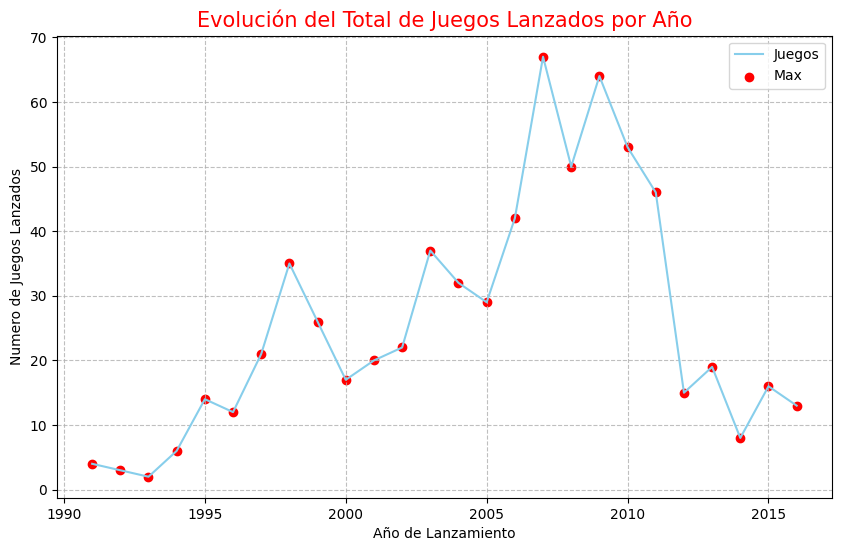

In [40]:
#Vamos a graficar la evolucion temporal para observar como desde 1980 se fueron lanzando videos juegos en diferentes Generos y cuando fue el pico de lanzamientos hasta 2020:

# Agrupa por año y cuenta la cantidad de juegos por género
genre_by_year = df.groupby(['Año', 'Genre'])['Genre'].count().reset_index(name='Count')

# Crea un gráfico de líneas para cada género
plt.figure(figsize=(10, 6))
plt.plot(genre_data['Año'], genre_data['Count'], label= 'Juegos', color = 'skyBlue') #Linea temporal
plt.scatter(genre_data['Año'], genre_data['Count'], color='Red', marker='o', label='Max') #Punto Maximo del Año
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Numero de Juegos Lanzados")
plt.title("Evolución del Total de Juegos Lanzados por Año", color = 'Red',fontsize=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

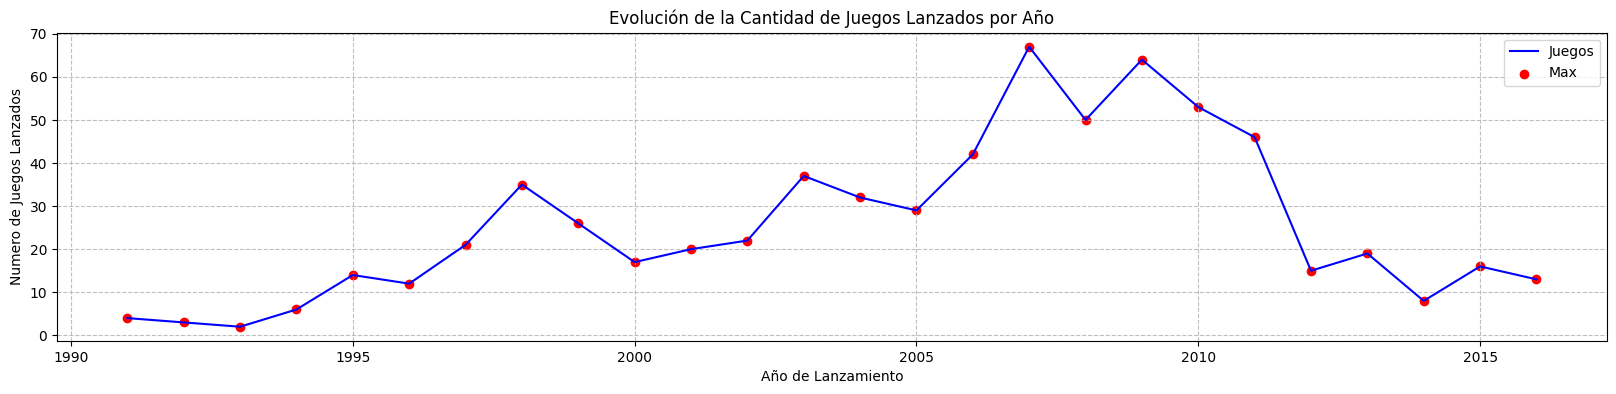

In [41]:
#GRAFICO DE LINEAS SUBPLOT
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(genre_data['Año'], genre_data['Count'], label='Juegos', color='Blue')
ax.scatter(genre_data['Año'], genre_data['Count'], color='Red', marker='o', label='Max')
ax.set_xlabel("Año de Lanzamiento")
ax.set_ylabel("Numero de Juegos Lanzados")
ax.set_title("Evolución de la Cantidad de Juegos Lanzados por Año")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.8)
plt.show()

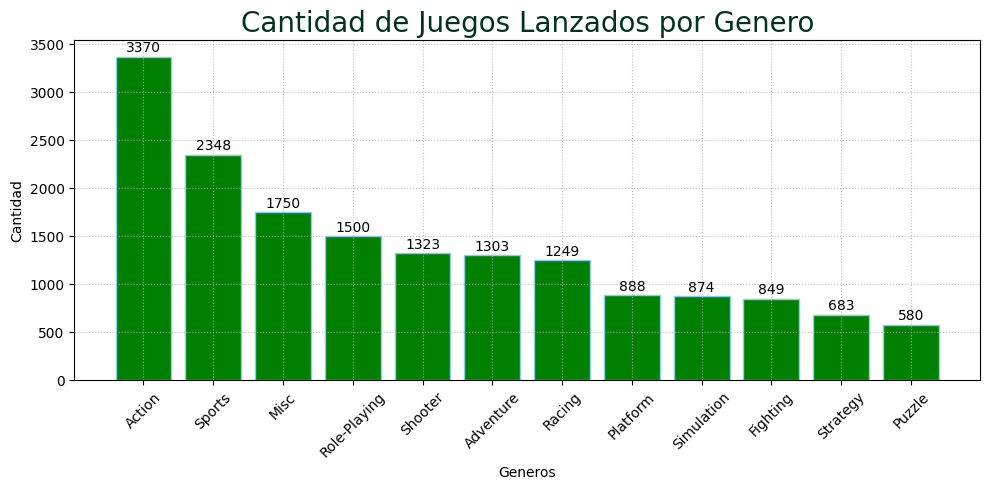

In [42]:
#Grafico por Genero de Juegos, donde analizaremos cuales fueron los generos mas lanzados:
plt.figure(figsize=(10, 5))

plt.bar_label(plt.bar(conteo_genero.index, conteo_genero.values, edgecolor='skyblue', color = 'Green'), fmt='%1.0f', padding=1) #Etiqueta de datos, color, fontsize,
plt.xlabel("Generos")
plt.ylabel("Cantidad")
plt.title("Cantidad de Juegos Lanzados por Genero", fontsize = 20, color = '#013220')
plt.grid(True,linestyle=':', alpha=0.8) #Grilla
plt.xticks(rotation=45)  #Rotacion
plt.tight_layout()  # Ajuste
plt.show()

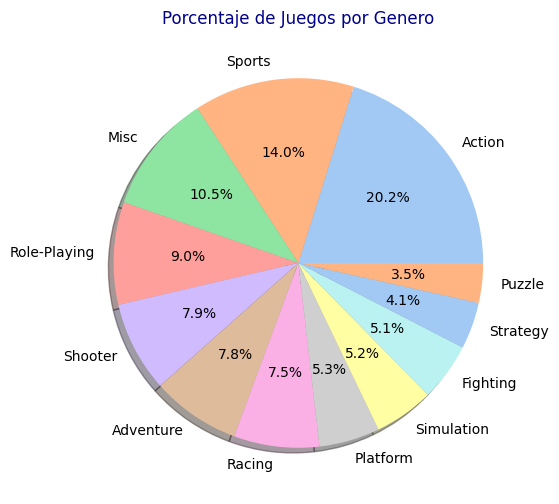

In [43]:
#Grafico de Pastel para notar la proporcion de los Juegos lanzados:

plt.figure(figsize=(24, 6))
plt.pie(df['Genre'].value_counts(), labels=df['Genre'].value_counts().index,autopct='%1.1f%%', shadow=True, startangle=0, colors=sns.color_palette('pastel'))
plt.title("Porcentaje de Juegos por Genero", color= '#00008B')
#plt.legend(df['Publisher'].unique())
plt.show()

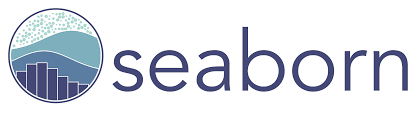

# Graficos con SEABORN

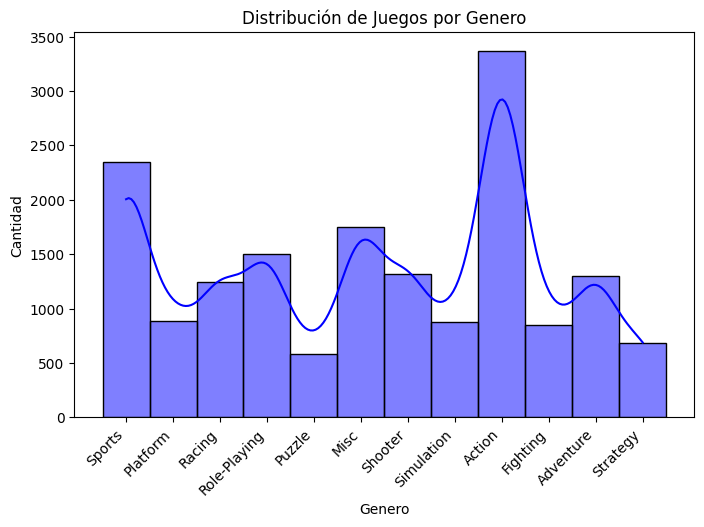

In [44]:
# Crear el gráfico de dispersión con Seaborn

plt.figure(figsize=(8, 5))
sns.histplot(df['Genre'], bins=30, kde=True, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Juegos por Genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.show()

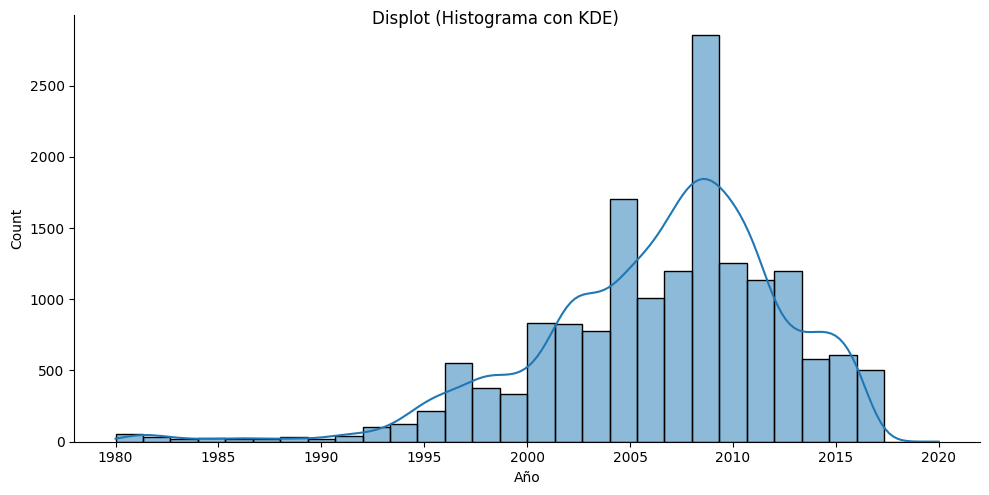

In [45]:
#Histograma con Seaborn
sns.displot(df['Año'], kind="hist", kde=True, height=5, aspect=2, bins=30) # height y aspect controlan tamaño
plt.suptitle("Displot (Histograma con KDE)") # Usar suptitle con displot
plt.show()

<ipython-input-46-f8e9fea234c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Genre', y='User_Count', palette='viridis')


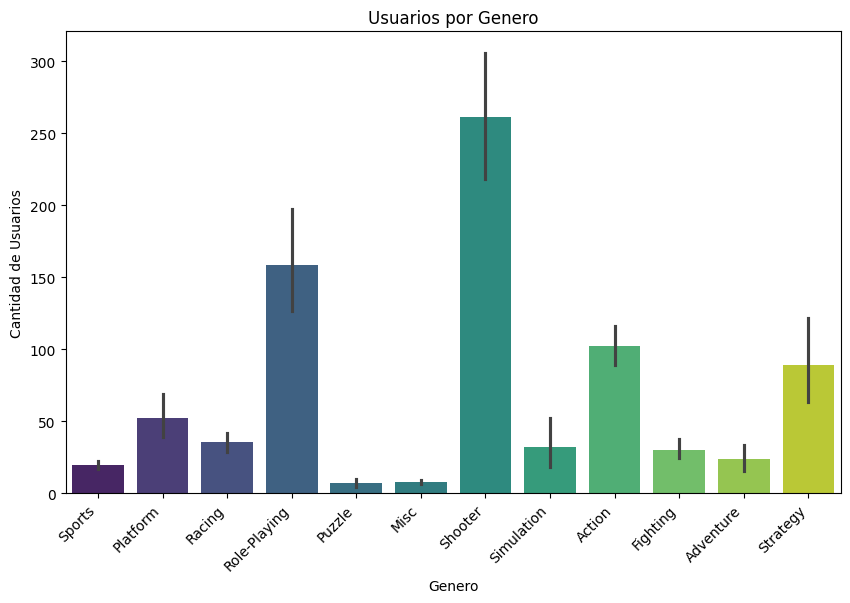

In [46]:
#Barplot de Cantidad de Users por Genero de Video Juego:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Genre', y='User_Count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Usuarios por Genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad de Usuarios')
plt.show()

In [47]:
#Convertimos los datos de Critic Score a Entero:
df['Critic_Score'] = df['Critic_Score'].fillna(0).astype(int)
#df.info()
df['Bajo_Score'] = np.where(df['Critic_Score'] < 50, 'Bajo Score', None)
df['Medio_Score'] = np.where((df['Critic_Score'] >=50) & (df['Critic_Score'] < 80), 'Medio Score', None)
df['Alto_Score'] = np.where(df['Critic_Score'] > 80, 'Alto Score', None)
df['Bajo_Score'].value_counts()
df['Medio_Score'].value_counts()
df['Alto_Score'].value_counts()
Score_Prom = df['Critic_Score'].mean()
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Año,Bajo_Score,Medio_Score,Alto_Score
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51.0,8,322,Nintendo,E,2006,None,Medio Score,None
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,NaN,NaN,0,NaN,NaN,1985,Bajo Score,None,None
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73.0,8.3,709,Nintendo,E,2008,None,None,Alto Score
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73.0,8,192,Nintendo,E,2009,None,None,None
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,NaN,NaN,0,NaN,NaN,1996,Bajo Score,None,None


In [48]:
Total_Score = (df[['Bajo_Score','Medio_Score','Alto_Score']]).count()
print('CANTIDAD DE JUEGOS SEGUN SU SCORE:')
Total_Score

CANTIDAD DE JUEGOS SEGUN SU SCORE:


,0
Bajo_Score,9384
Medio_Score,5323
Alto_Score,1775


In [49]:
#Agrupamos por Genero y Valoracion de Score:
df[['Genre','Bajo_Score','Medio_Score','Alto_Score']].groupby('Genre').count().round(1)

,Bajo_Score,Medio_Score,Alto_Score
Genre,,,
Action,1704,1303,312
Adventure,1022,229,48
Fighting,481,261,94
Misc,1296,366,75
Platform,438,350,90
Puzzle,378,168,33
Racing,586,478,162
Role-Playing,793,474,209
Shooter,479,568,247


<ipython-input-50-c15d68782ce4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Score, x='Genre', y='Critic_Score', palette = 'pastel')


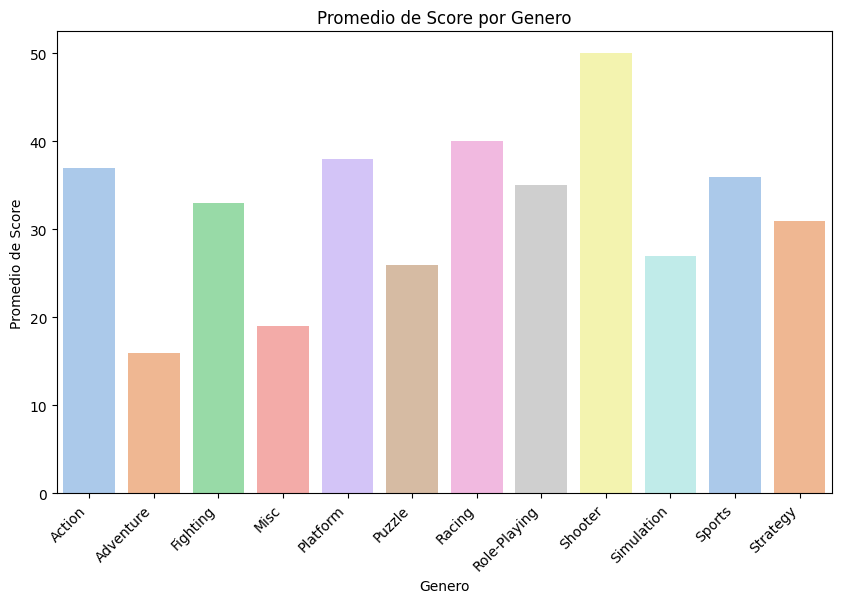

In [50]:
#Agrupamos por Genero y Valoracion de Score:
Score = df[['Genre','Critic_Score']].groupby('Genre').mean().astype(int)

plt.figure(figsize=(10, 6))
sns.barplot(data = Score, x='Genre', y='Critic_Score', palette = 'pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Promedio de Score por Genero')
plt.xlabel('Genero')
plt.ylabel('Promedio de Score')
plt.show()


# **Conclusiones**
✅ Desde 1980 la mayor cantidad de juegos lanzados fue del genero: Action ⚔

✅ La Mayor cantidad de User eligen juegos del Genero: Shooter 🔫

✅ Los Juegos con Mejor Score fueron del Genero: Shooter 🔫
